# Analysis and Exploration of Daily Exchange Rates per Euro 1999-2023

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries and Notebook Setup
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
3. [**Data Proprocessing**](#3)
4. [**Exploratory Data Analysis**](#4)
5. [**Conclusion**](#5)
    - Insights
    - Suggestions
    - Possible Next Steps
6. [**Epilogue**](#6) 
    - References
    - Versioning

---

# 1

## Introduction

![Dataset Cover]("dataset-cover.jpg")

### Project Description

**Goal/Purpose:** 

What is this project about? What is the the goal/purpose of this project? Why is it important for someone to read this notebook?
This project will demonstrate all skills learned in the Data Analysis in Python course through Dataquest, up through this assignment (Part 2: Intermediate Python and Pandas, Section 3: Telling Stories Using Data Visualization and Information Design, Guided Project: Storytelling Data Visualization on Exchange Rates).

The dataset describes daily Euro exchange rates between 4 January 1999 and 18 April 2023. The Euro (€) is the official currency in most of the countries of the European Union.

<p>&nbsp;</p>

**Questions to be Answered:**

- What is the overall trend of the exchange rates over the 23-year period?
- Are there any noteable spikes or dips in specific currencies' exchange rates over time? What might have caused them?
- Which currency had the highest and lowest exchange rate against the euro during this time period?
- Are there any correlations between certain currencies' exchange rates?
- Are there any seasonal patterns in the exchange rates?
- Are there any patterns in the exchange rate changes that can be linked to major economic events, such as recessions or fincancial crisis?
- Are there any differences in exchange rate trends between developed and developing countries?
- Are there any exchange rate trends that can be attributed to political events or decisions?
- How do exchange rates for different currencies compare in terms of volatility or stability over the 23 year period?

<p>&nbsp;</p>

**Assumptions/Methodology/Scope:** 

Assumptions:
- The exchange rates were calculated using a consistent methodology throughout the time period covered by the dataset.
- The exchange rates reflect the value of the currency in the context of the euro zone, rather than in other regions or countries.
- The exchange rates are representative of the broader economy of each country represented in the dataset, rather than being influenced by specific industries or sectors.
- The exchange rates are not significantly affected by currency speculation or market manipulation.

Processing steps:
- Remove any missing values or errors from the data set.
- Normalize the exchange rate values to account for differences in currency values.
- Calculate summary statistics (e.g. means, medians, standard deviations) to understand the distribution of exchange rate values.
- Create visualizations (e.g. line charts, scatter plots) to identify trends and patterns in the exchange rate data.
- Perform statistical tests (e.g. ANOVA, regression) to explore relationships between different currency values.

Scope:
- The project aims to provide insights into patterns and trends in daily exchange rates for a selection of currencies over a period of 23 years.
- The project does not aim to provide definitive explanations for any observed trends, nor to make predictions about future exchange rate values.
- The project will use a range of data cleaning, analysis, and visualization techniques to explore the data and generate insights, with a focus on creating clear and understandable visualizations and summaries.

<p>&nbsp;</p>

### Data Description

**Content:** 

This dataset is a CSV file of 6284 data points which contains daily euro foreign exchange rates observed on major foreign exchange trading venues at a certain point in time for 40 currencies. The rates are usually updated around 16:00 CET on every working day, except on TARGET closing days.
<p>&nbsp;</p>

**Description of Attributes:** 

Each column represents a different currency: Australian dollar, Bulgarian lev, Brazilian real, Canadian dollar, Swiss franc, Chinese yuan renminbi, Cypriot pound, Czech koruna, Danish krone, Estonian kroon, UK pound sterling, Greek drachma, Hong Kong dollar, Croatian kuna, Hungarian forint, Indonesian rupiah, Israeli shekel, Indian rupee, Iceland krona, Japanese yen, Korean won, Lithuanian litas, Latvian lats, Maltese lira, Mexican peso, Malaysian ringgit, Norwegian krone, New Zealand dollar, Philippine peso, Polish zloty, Romanian leu, Russian rouble, Swedish krona, Singapore dollar, Slovenian tolar, Slovak koruna, Thai baht, Turkish lira, US dollar, South African rand.

Notes: 
- The following currencies have since switched to using the Euro and therefore no longer exist: Cypriot pound (2007), Estonian kroon (2011), Greek drachma (2002), Lithuanian litas (2015), Latvian lats (2014), Maltese lira (2008), Slovenian tolar (2007), Slovak koruna (2009). 
- Since 2002 the Bulgarian lev is locked to the rate of 1 € = 1.9558 leva.

<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by Kaggle. The original dataset was scraped by Daria Chemkaeva and the original source can be found on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020?resource=download). This dataset is frequently updated, the data used for this set was downloaded 21 April 2023.

---

# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [22]:
# Ignore warnings if needed
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import datetime
import re
import numpy as np
import pandas as pd
import pandas.api.types as ptypes

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.3f}'.format

# Visualization settings
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = (16, 5)   
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
# rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
custom_palette = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
custom_hue = ['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0', '#c1e7ff']
custom_divergent = ['#00876c', '#6aaa96', '#aecdc2', '#f1f1f1', '#f0b8b8', '#e67f83', '#d43d51']
sns.set_palette(custom_palette)
%config InlineBackend.figure_format = 'retina'

### Loading Data

In [23]:
# Load DataFrame
file = 'euro-daily-hist_1999_2022.csv'
euro = pd.read_csv(file)

### Basic Data Exploration

#### Number of Rows and Columns

In [24]:
# Show rows and columns count
print(f"Rows count: {euro.shape[0]}\nColumns count: {euro.shape[1]}")

Rows count: 6284
Columns count: 41


#### Display First and Last Rows

In [25]:
# Look at first 5 rows
euro.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-04-18,1.6276,1.9558,5.3899,1.4679,0.9831,7.5436,NaN,23.373,7.4513,NaN,0.88143,NaN,8.6129,NaN,371.68,16319.23,3.9937,89.9955,149.700,146.89,1445.35,NaN,NaN,NaN,19.7174,4.8650,11.4675,1.7637,61.730,4.6180,4.936,NaN,11.2955,1.4614,NaN,NaN,37.6230,21.281,1.0972,19.9299
1,2023-04-17,1.6356,1.9558,5.3861,1.4673,0.9812,7.5433,NaN,23.345,7.4520,NaN,0.88373,NaN,8.6200,NaN,371.70,16299.22,4.0005,90.0607,149.700,146.97,1444.13,NaN,NaN,NaN,19.7526,4.8558,11.3640,1.7717,61.449,4.6288,4.942,NaN,11.3163,1.4615,NaN,NaN,37.7530,21.284,1.0981,19.8937
2,2023-04-14,1.6309,1.9558,5.4410,1.4725,0.9827,7.5761,NaN,23.341,7.4510,NaN,0.88440,NaN,8.6797,NaN,373.68,16291.79,4.0426,90.3595,149.700,146.60,1438.43,NaN,NaN,NaN,19.9598,4.8673,11.4020,1.7588,61.122,4.6435,4.942,NaN,11.3455,1.4665,NaN,NaN,37.6600,21.422,1.1057,19.9352
3,2023-04-13,1.6343,1.9558,5.4117,1.4759,0.9804,7.5758,NaN,23.271,7.4509,NaN,0.88058,NaN,8.6468,NaN,374.55,16224.93,4.0277,90.1665,149.100,146.81,1441.15,NaN,NaN,NaN,19.9235,4.8466,11.4570,1.7624,60.972,4.6320,4.944,NaN,11.3886,1.4592,NaN,NaN,37.5480,21.291,1.1015,19.9710
4,2023-04-12,1.6377,1.9558,5.4635,1.4728,0.9853,7.5183,NaN,23.421,7.4506,NaN,0.88038,NaN,8.5737,NaN,376.23,16253.32,4.0138,89.6875,149.100,146.09,1448.10,NaN,NaN,NaN,19.7972,4.8193,11.4745,1.7649,60.291,4.6631,4.939,NaN,11.3480,1.4538,NaN,NaN,37.3910,21.098,1.0922,20.1330


In [26]:
# Look at last 5 rows
euro.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6279,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.990,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.314,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.372,1.1659,6.7855
6280,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.060,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.309,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.370,1.1632,6.8283
6281,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.540,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.317,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.372,1.1743,6.7307
6282,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.530,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.317,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.373,1.1790,6.7975
6283,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.480,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.311,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.372,1.1789,6.9358


#### Check Data Types

In [27]:
# Show data types
euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6284 entries, 0 to 6283
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6284 non-null   object 
 1   [Australian dollar ]      6284 non-null   object 
 2   [Bulgarian lev ]          5882 non-null   object 
 3   [Brazilian real ]         6016 non-null   object 
 4   [Canadian dollar ]        6284 non-null   object 
 5   [Swiss franc ]            6284 non-null   object 
 6   [Chinese yuan renminbi ]  6016 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6284 non-null   object 
 9   [Danish krone ]           6284 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6284 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6284 non-null   object 
 14  [Croatia

- 38 columns are **strings**
- 3 columns are **floats**

#### Check Missing Data

In [28]:
# Print percentage of missing values
missing_percent = euro.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
    print(missing_percent[missing_percent > 0] * 100)
else:
    print(None)

---- Percentage of Missing Values (%) -----
[Greek drachma ]           91.725
[Slovenian tolar ]         66.820
[Cypriot pound ]           62.667
[Maltese lira ]            62.667
[Slovak koruna ]           58.498
[Estonian kroon ]          50.191
[Iceland krona ]           38.304
[Latvian lats ]            37.874
[Lithuanian litas ]        33.816
[Bulgarian lev ]            6.397
[Croatian kuna ]            5.458
[Russian rouble ]           4.615
[Brazilian real ]           4.265
[Indian rupee ]             4.265
[Chinese yuan renminbi ]    4.265
[Israeli shekel ]           4.265
[Romanian leu ]             0.987
[Turkish lira ]             0.987
dtype: float64


#### Check for Duplicate Rows

In [29]:
# Show number of duplicated rows
print(f"No. of entirely duplicated rows: {euro.duplicated().sum()}")

# Show duplicated rows
euro[euro.duplicated()]

No. of entirely duplicated rows: 0


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]


#### Check Uniqueness of Data

In [30]:
# Print the number of unique values
num_unique = euro.nunique().sort_values()
print('---- Number of Unique Values -----')
print(num_unique)

---- Number of Unique Values -----
[Estonian kroon ]              2
[Bulgarian lev ]             106
[Greek drachma ]             323
[Maltese lira ]              426
[Danish krone ]              485
[Cypriot pound ]             498
[Lithuanian litas ]          771
[Latvian lats ]             1078
[Slovenian tolar ]          1377
[Iceland krona ]            1945
[Slovak koruna ]            2014
[Croatian kuna ]            2305
[Canadian dollar ]          3065
[Swiss franc ]              3215
[Australian dollar ]        3636
[Japanese yen ]             3679
[US dollar ]                3729
[UK pound sterling ]        3778
[Singapore dollar ]         3827
[Norwegian krone ]          3909
[Czech koruna ]             3969
[New Zealand dollar ]       4013
[Hungarian forint ]         4448
[Polish zloty ]             4545
[Romanian leu ]             4666
[Swedish krona ]            4850
[Malaysian ringgit ]        4994
[Israeli shekel ]           5088
[Chinese yuan renminbi ]    5283
[Turkish

#### Check Data Range

In [31]:
# Print summary statistics
euro.describe(include='all')

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
count,6284,6284,5882,6016,6284,6284,6016,2346,6284,6284,3130,6284,520,6284,5941,6284,6284,6016,6016,"3,877.000",6284,6284,4159,3904,2346,6284,6284,6284,6284,6284,6284,"6,222.000",5994,6284,6284,2085,2608,6284,"6,222.000",6284,6284
unique,6284,3636,106,5420,3065,3215,5283,498,3969,485,2,3778,323,5749,2305,4448,6188,5088,5696,NaN,3679,5842,771,1078,426,6071,4994,3909,4013,5443,4545,NaN,5705,4850,3827,1377,2014,5477,NaN,3729,6036
top,2023-04-18,-,1.9558,-,-,-,-,0.58420,27.021,-,15.6466,-,340.75,-,-,-,-,-,-,NaN,-,-,3.45280,0.6960,0.4293,-,-,-,-,-,-,NaN,-,-,-,239.5000,-,-,NaN,-,-
freq,1,62,4549,61,62,62,61,108,120,62,3074,62,9,62,61,62,62,62,61,NaN,62,62,2732,194,690,62,62,62,62,62,62,NaN,62,62,62,44,48,62,NaN,62,62
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.967,NaN,NaN,NaN,NaN,NaN,NaN,3.830,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877,NaN,NaN,NaN,NaN,NaN,NaN,4.161,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.291,NaN,NaN,NaN,NaN,NaN,NaN,0.370,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.549,NaN,NaN,NaN,NaN,NaN,NaN,1.727,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.279,NaN,NaN,NaN,NaN,NaN,NaN,2.211,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.553,NaN,NaN,NaN,NaN,NaN,NaN,3.925,NaN,NaN


### Areas to Fix
**Data Types**
- the 38 columns with **strings** should be converted to **floats** for calculations
- `column 0` should be converted to a **datetime** format

**Missing Data**
- As expected, some currencies are missing significant amounts of data. Exploration of these currencies will occur on a case by case basis, as determined by to-be-set threshold based on overall proportion of missing data.   

**Duplicate Rows**
- No duplicated rows

**Uniqueness of Data**
- Currencies with a low uniqueness of data will be cross checked with the list of currencies missing data to determine whether or not they are significant enough to be included in this analysis

**Data Range**
- Will need to be observed again after converting the datatypes

---

# 3

## Data Preprocessing

### Rename Columns

In [32]:
# Rename columns
euro.rename(columns=lambda x: x.strip('[] '), inplace=True)
euro.rename(columns={'Period\\Unit:': 'Time'}, inplace=True)
euro.reset_index(drop=True, inplace=True)

# Verify columns are renamed
euro.columns

Index(['Time', 'Australian dollar', 'Bulgarian lev', 'Brazilian real',
       'Canadian dollar', 'Swiss franc', 'Chinese yuan renminbi',
       'Cypriot pound', 'Czech koruna', 'Danish krone', 'Estonian kroon',
       'UK pound sterling', 'Greek drachma', 'Hong Kong dollar',
       'Croatian kuna', 'Hungarian forint', 'Indonesian rupiah',
       'Israeli shekel', 'Indian rupee', 'Iceland krona', 'Japanese yen',
       'Korean won', 'Lithuanian litas', 'Latvian lats', 'Maltese lira',
       'Mexican peso', 'Malaysian ringgit', 'Norwegian krone',
       'New Zealand dollar', 'Philippine peso', 'Polish zloty', 'Romanian leu',
       'Russian rouble', 'Swedish krona', 'Singapore dollar',
       'Slovenian tolar', 'Slovak koruna', 'Thai baht', 'Turkish lira',
       'US dollar', 'South African rand'],
      dtype='object')

### Changing Data Types

In [33]:
euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6284 entries, 0 to 6283
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   6284 non-null   object 
 1   Australian dollar      6284 non-null   object 
 2   Bulgarian lev          5882 non-null   object 
 3   Brazilian real         6016 non-null   object 
 4   Canadian dollar        6284 non-null   object 
 5   Swiss franc            6284 non-null   object 
 6   Chinese yuan renminbi  6016 non-null   object 
 7   Cypriot pound          2346 non-null   object 
 8   Czech koruna           6284 non-null   object 
 9   Danish krone           6284 non-null   object 
 10  Estonian kroon         3130 non-null   object 
 11  UK pound sterling      6284 non-null   object 
 12  Greek drachma          520 non-null    object 
 13  Hong Kong dollar       6284 non-null   object 
 14  Croatian kuna          5941 non-null   object 
 15  Hung

In [34]:
# Convert columns to the right data types
euro['Time']  = pd.to_datetime(euro['Time'], infer_datetime_format=True)

cols = euro.columns[1:]
euro[cols] = euro[cols].apply(pd.to_numeric, errors='coerce')

In [35]:
# Verify conversion
assert ptypes.is_datetime64_any_dtype(euro['Time'])
assert all(ptypes.is_numeric_dtype(euro[col]) for col in cols[1:] )

### Dropping Duplicates

No duplicates to drop.

### Handling Missing Values

In [36]:
missing_percent = euro.isna().mean().sort_values(ascending=False)
currencies_to_remove = []
print('---- Currencies with > 5% Missing Data -----')
if missing_percent.sum():
    print(missing_percent[missing_percent > .05 ] * 100)

for currency in missing_percent[missing_percent > .05 ].keys() :
    currencies_to_remove.append(currency)



---- Currencies with > 5% Missing Data -----
Greek drachma           91.820
Slovenian tolar         67.393
Cypriot pound           63.335
Maltese lira            63.335
Slovak koruna           59.262
Estonian kroon          51.082
Latvian lats            38.861
Iceland krona           38.304
Lithuanian litas        34.803
Bulgarian lev            7.320
Croatian kuna            6.429
Russian rouble           5.602
Israeli shekel           5.251
Chinese yuan renminbi    5.236
Brazilian real           5.236
Indian rupee             5.236
dtype: float64


In [37]:
euro = euro.drop(currencies_to_remove, axis=1)
euro.dropna(subset=euro.columns[1:], thresh=4, inplace=True)


### Handling Unreasonable Data Ranges

In [38]:
euro.describe()

,Time,Australian dollar,Canadian dollar,Swiss franc,Czech koruna,Danish krone,UK pound sterling,Hong Kong dollar,Hungarian forint,Indonesian rupiah,Japanese yen,Korean won,Mexican peso,Malaysian ringgit,Norwegian krone,New Zealand dollar,Philippine peso,Polish zloty,Romanian leu,Swedish krona,Singapore dollar,Thai baht,Turkish lira,US dollar,South African rand
count,6222,"6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000","6,222.000"
mean,2011-02-24 03:15:06.075216896,1.577,1.466,1.330,28.094,7.448,0.777,9.272,290.315,"13,041.806",127.796,"1,350.066",16.676,4.418,8.648,1.813,57.421,4.173,3.967,9.501,1.740,41.610,3.830,1.191,11.971
min,1999-01-04 00:00:00,1.164,1.214,0.944,22.968,7.423,0.571,6.436,228.160,"6,707.810",89.300,938.670,7.624,3.155,7.223,1.388,36.836,3.205,1.291,8.055,1.384,33.204,0.370,0.825,6.079
25%,2005-01-27 06:00:00,1.481,1.397,1.104,25.545,7.439,0.681,8.485,254.585,"11,341.597",117.222,"1,250.057",13.668,4.111,7.952,1.662,53.068,3.979,3.549,9.068,1.567,37.919,1.727,1.090,8.757
50%,2011-02-22 12:00:00,1.595,1.463,1.286,27.022,7.447,0.803,9.229,280.320,"12,997.600",128.885,"1,333.705",16.883,4.568,8.252,1.765,58.317,4.192,4.279,9.303,1.659,40.277,2.211,1.185,11.135
75%,2017-03-20 18:00:00,1.669,1.539,1.544,30.195,7.458,0.864,10.178,312.438,"15,509.147",136.240,"1,428.293",20.493,4.755,9.414,1.965,62.480,4.357,4.553,10.105,1.970,45.095,3.925,1.310,15.372
max,2023-04-18 00:00:00,2.074,1.812,1.680,38.583,7.473,0.979,12.470,430.650,"18,239.610",169.750,"1,993.950",27.090,5.186,12.316,2.554,76.758,4.952,4.952,11.713,2.232,53.536,21.422,1.599,20.845
std,NaN,0.149,0.098,0.218,3.545,0.011,0.100,1.223,41.136,"2,825.312",15.481,160.645,4.701,0.462,0.959,0.202,7.826,0.309,0.877,0.688,0.218,4.752,4.161,0.158,3.836


**Potentially concerning data ranges:**
- 

In [39]:
# # Drop affected rows
# df = df.loc[~((df['A'] == 0) | (df['B'] > 100))].reset_index()

In [40]:
# # Verify rows dropped
# len(df)

### Feature Engineering / Transformation

---

# 4

## Exploratory Data Analysis

Here is where your analysis begins. You can add different sections based on your project goals.

### Exploring `US dollar`

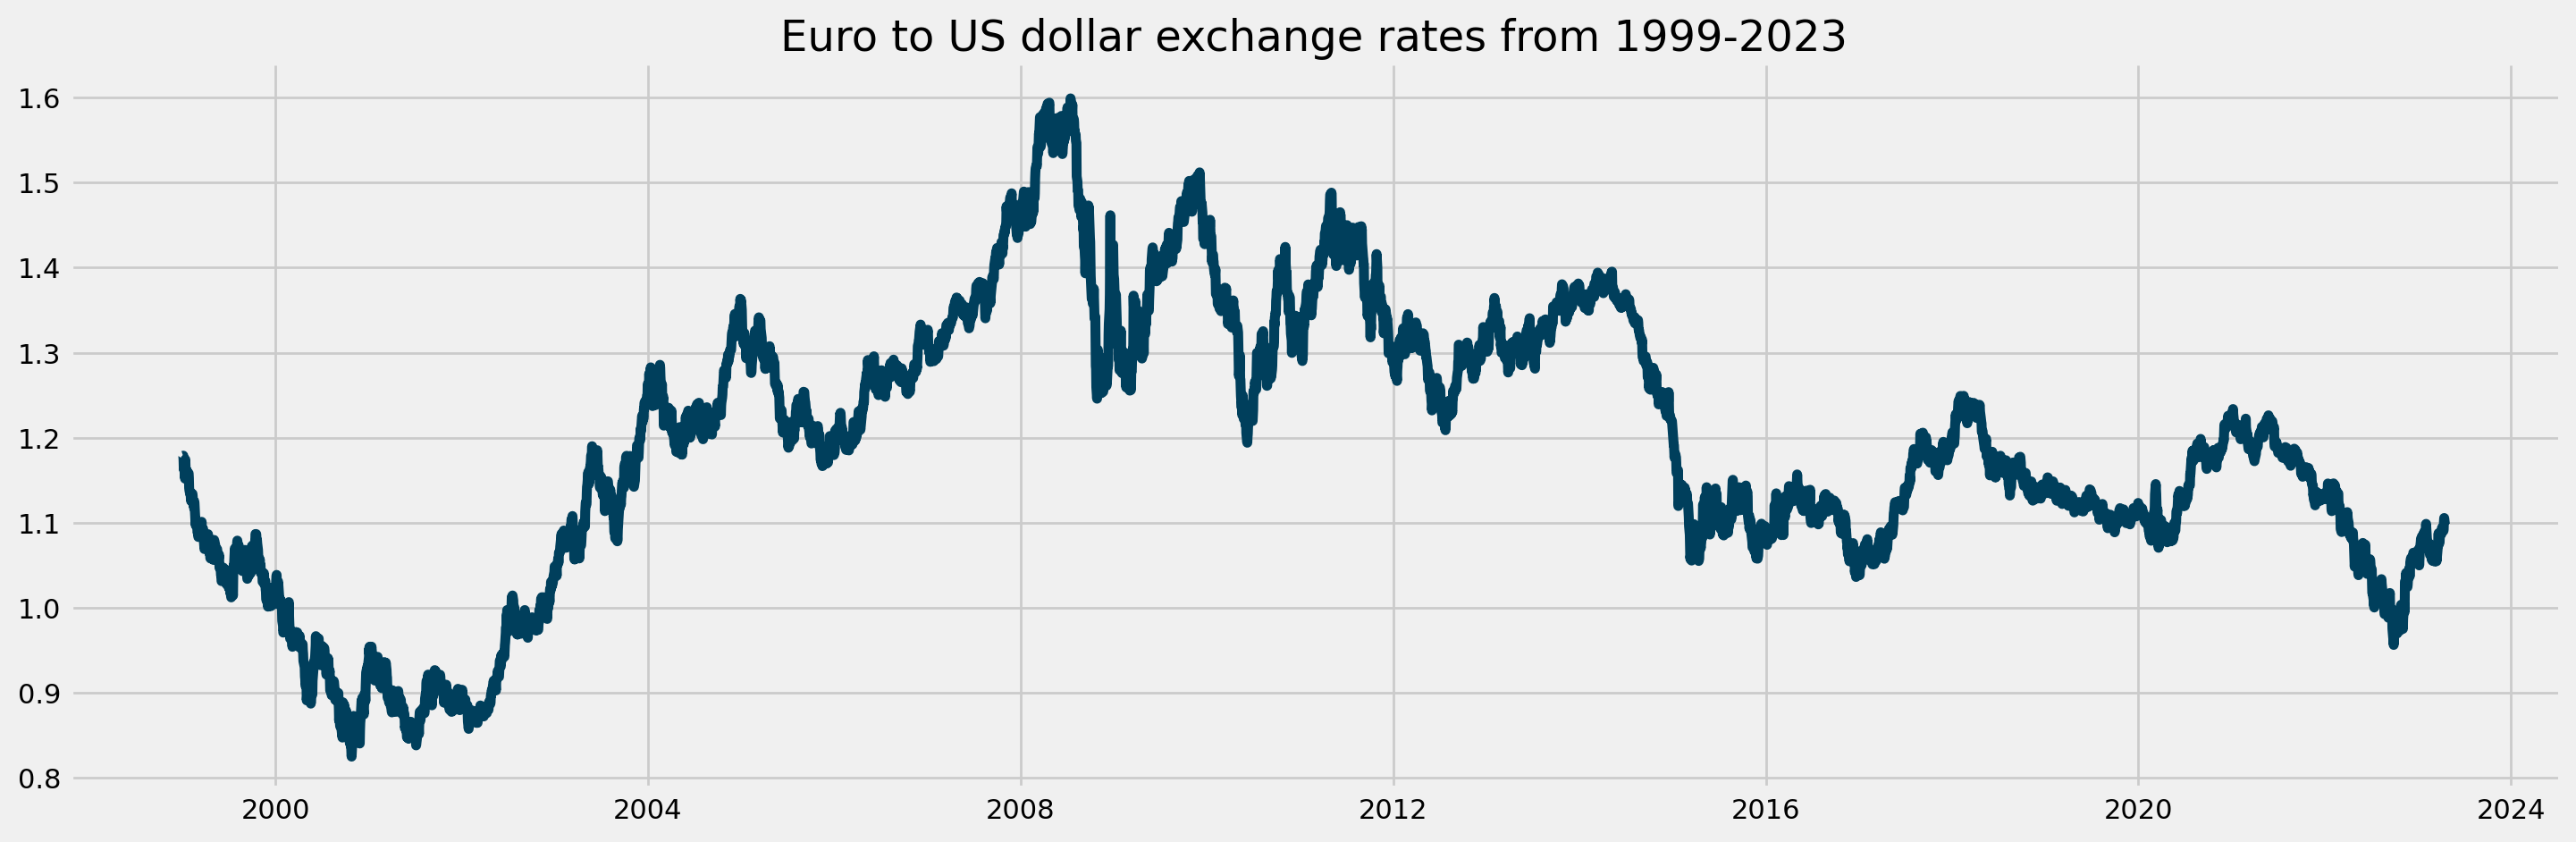

In [53]:

# Code and visualization
euro_to_dollar = euro.loc[:, ['Time', 'US dollar']]

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US dollar'])
plt.title('Euro to US dollar exchange rates from 1999-2023')
plt.show()

The above graph has a jittery appearance, as it's working to plot each day there is data recorded. For purposes of this project, daily granularity is not needed and therefore another graph will be created representing a rolling mean of the exchange rate amount over 30 days, for the full 1999-2023 time frame. 

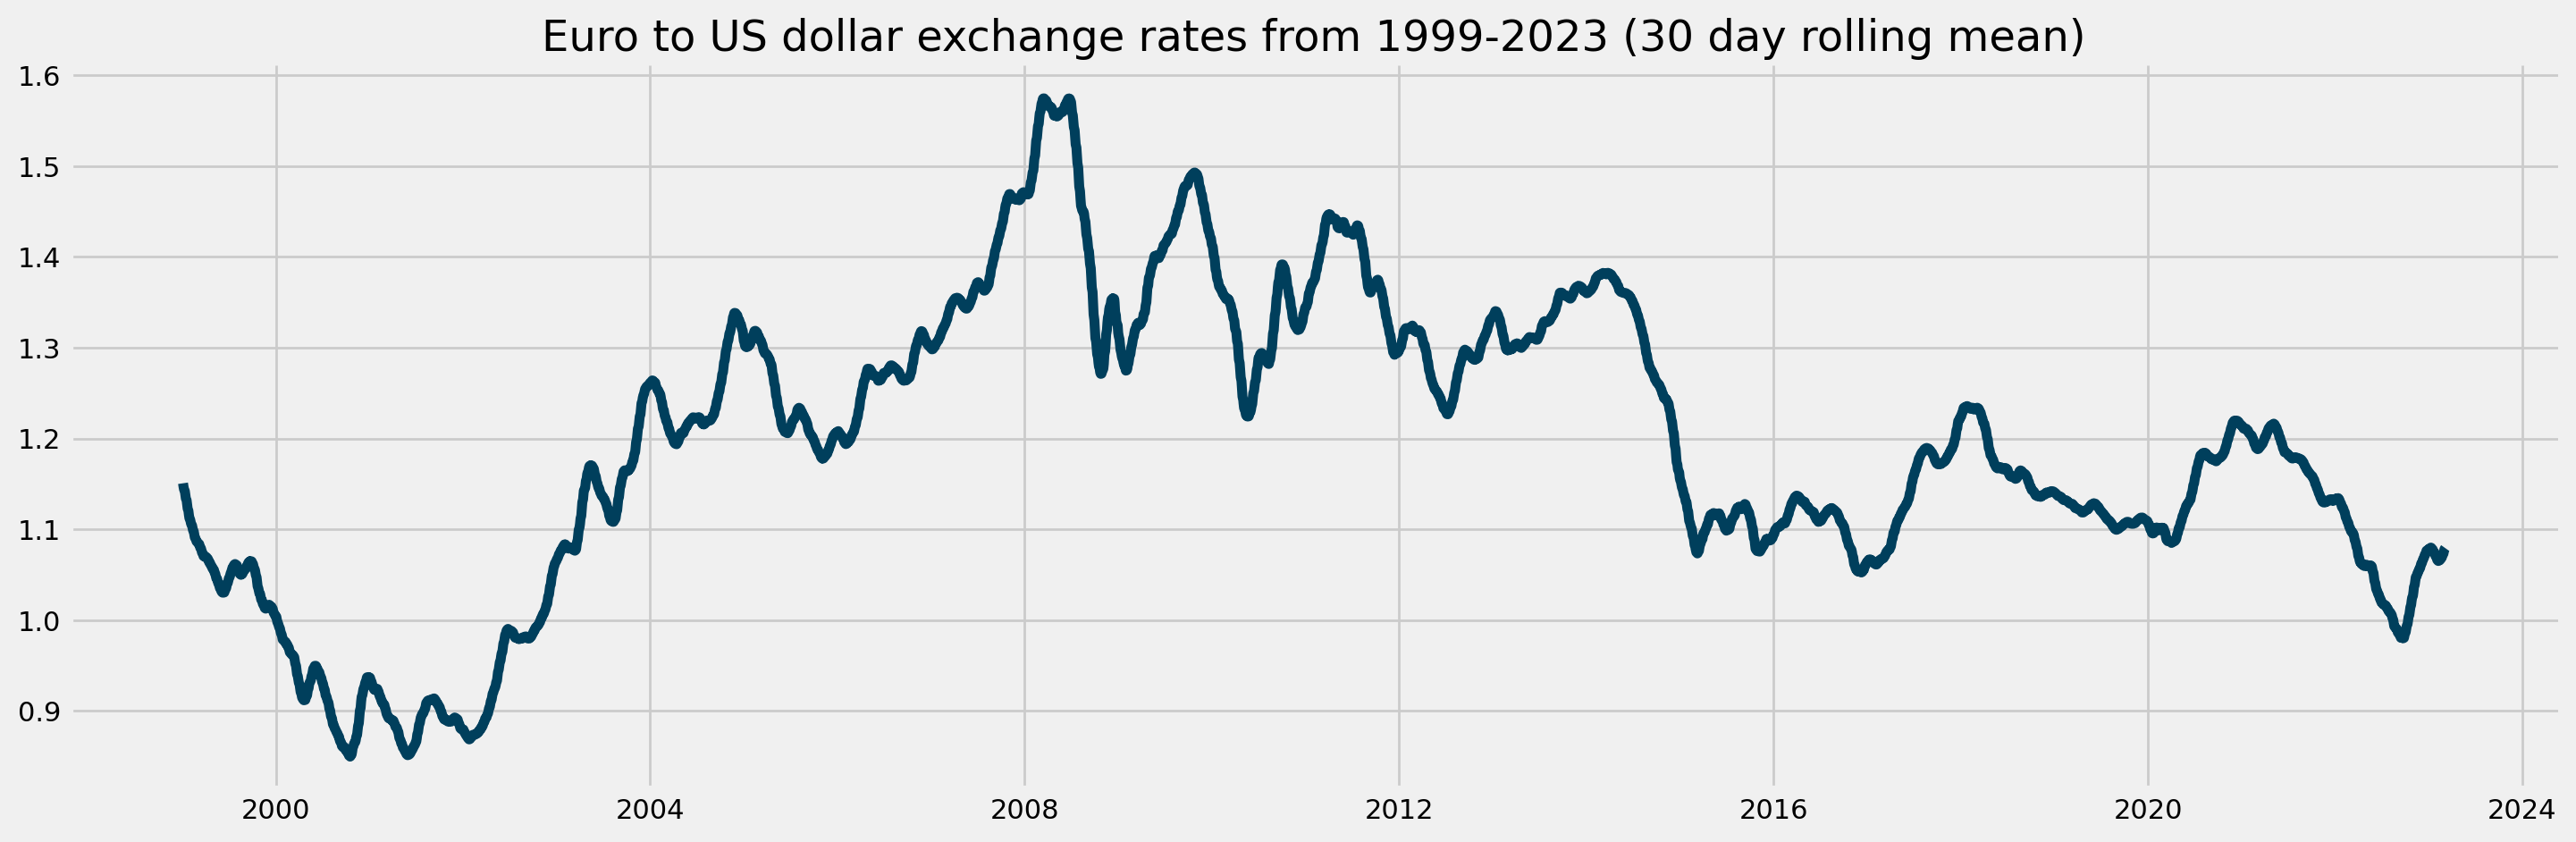

In [52]:
#Calculate rolling mean and add it to our euro_to_us dataframe
euro_to_dollar['rolling_mean_30'] = euro_to_dollar['US dollar'].rolling(30).mean()

#Plot the rolling mean
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean_30'])
plt.title('Euro to US dollar exchange rates from 1999-2023 (30 day rolling mean)')
plt.show()

**Observations**
- Peak appeared in 2008, low around 2001
- Current exchange rates are lower than they were in 1999
- Overall the exchange rates are very volatile

### Learn
On this screen, we're going to spend some time coming up with an idea for the graph we want to build. Our goal is to create a storytelling data visualization using the data we have.

To create a story, remember that we need to arrange our data into a series of events that show change.

Here are a few story ideas for our data:

We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.
These are just a few ideas — you should think of a story angle that you find interesting.

Don't become frustrated if you don't have an idea — creativity is unpredictable. Sometimes you can have ten ideas in a minute, and sometimes you won't have any ideas in a week.

If you don't have any ideas, you can choose one from the examples above. What is important here is to spend at least a few minutes brainstorming graph ideas.

Instructions
Note one idea regarding the storytelling data visualization you want to build.

Learn
Now that we know what story we want to tell, we're going to think more about how the graph is going to look.

First, we need to choose the right graph type. The graph should give our story the visual form it needs — we don't want to choose a histogram to visually represent a time series.

Equally important, we need to choose something that our audience will be familiar with. To simplify your work, you can choose any audience you want for your graph.

Next, we're going to sketch the graph — we do this before writing the code. In sketching the graph, it's important to use some of the principles we've learned so far:

Maximize the data-ink ratio.
Create visual patterns using Gestalt principles.
Guide the audience's attention using pre-attentive attributes.
These design principles can help you in two ways:

They generate design options.
They help you choose among those options.
We advise using pen and paper to sketch the graph because it gives you more flexibility. Alternatively, you can make the sketch using a graphics editor.

---

# 5

## Conclusion

### Insights 
State the insights/outcomes of your project or notebook.

### Suggestions

Make suggestions based on insights.

### Possible Next Steps
Areas to expand on:
- (if there is any)

---

# 6

## Epilogue

### References

This is how we use inline citation[<sup id="fn1-back">[1]</sup>](#fn1).

[<span id="fn1">1.</span>](#fn1-back) _subject (date)._ Title. Available at: https://website.com (Accessed: Date). 

> Use [https://www.citethisforme.com/](https://www.citethisforme.com/) to create citations.

### Versioning
Notebook and insights by (author).
- Version: 1.0.0
- Date: 